In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas_profiling as pp
import dtale
from autoviz.AutoViz_Class import AutoViz_Class
import sweetviz as sv
from sklearn.datasets import load_iris

%matplotlib inline


In [2]:
df = pd.read_csv('Pokemon.csv')
#autoviz = AutoViz_Class().AutoViz('Pokemon.csv')
#sweet_report = sv.analyze(df)
#sweet_report.show_notebook()

In [3]:
df['Legendary'] = df['Legendary'].astype(int)
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,0
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,0
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,0
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,0
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,0


<AxesSubplot:xlabel='HP', ylabel='Attack'>

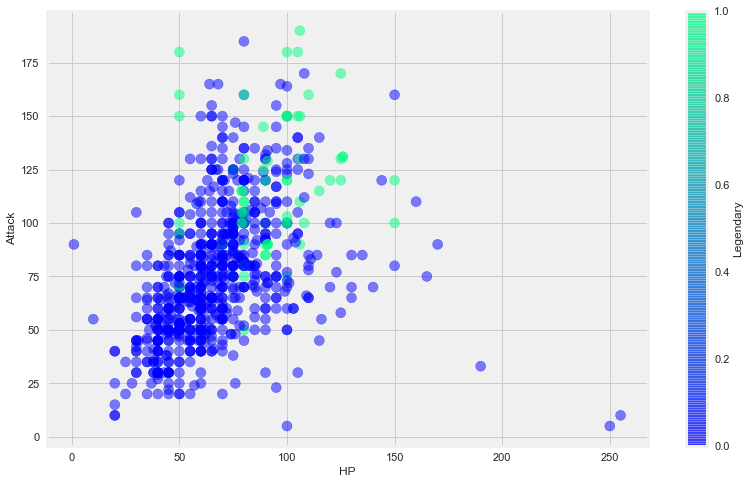

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
df.plot(kind='scatter', x = 'HP',y = 'Attack',s = 100,
c = 'Legendary',cmap='winter',alpha = 0.5,ax = ax)

In [5]:
df.loc[:,'HP':'Speed'].corr()

,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed
HP,1.000000,0.422386,0.239622,0.362380,0.378718,0.175952
Attack,0.422386,1.000000,0.438687,0.396362,0.263990,0.381240
Defense,0.239622,0.438687,1.000000,0.223549,0.510747,0.015227
Sp. Atk,0.362380,0.396362,0.223549,1.000000,0.506121,0.473018
Sp. Def,0.378718,0.263990,0.510747,0.506121,1.000000,0.259133
Speed,0.175952,0.381240,0.015227,0.473018,0.259133,1.000000


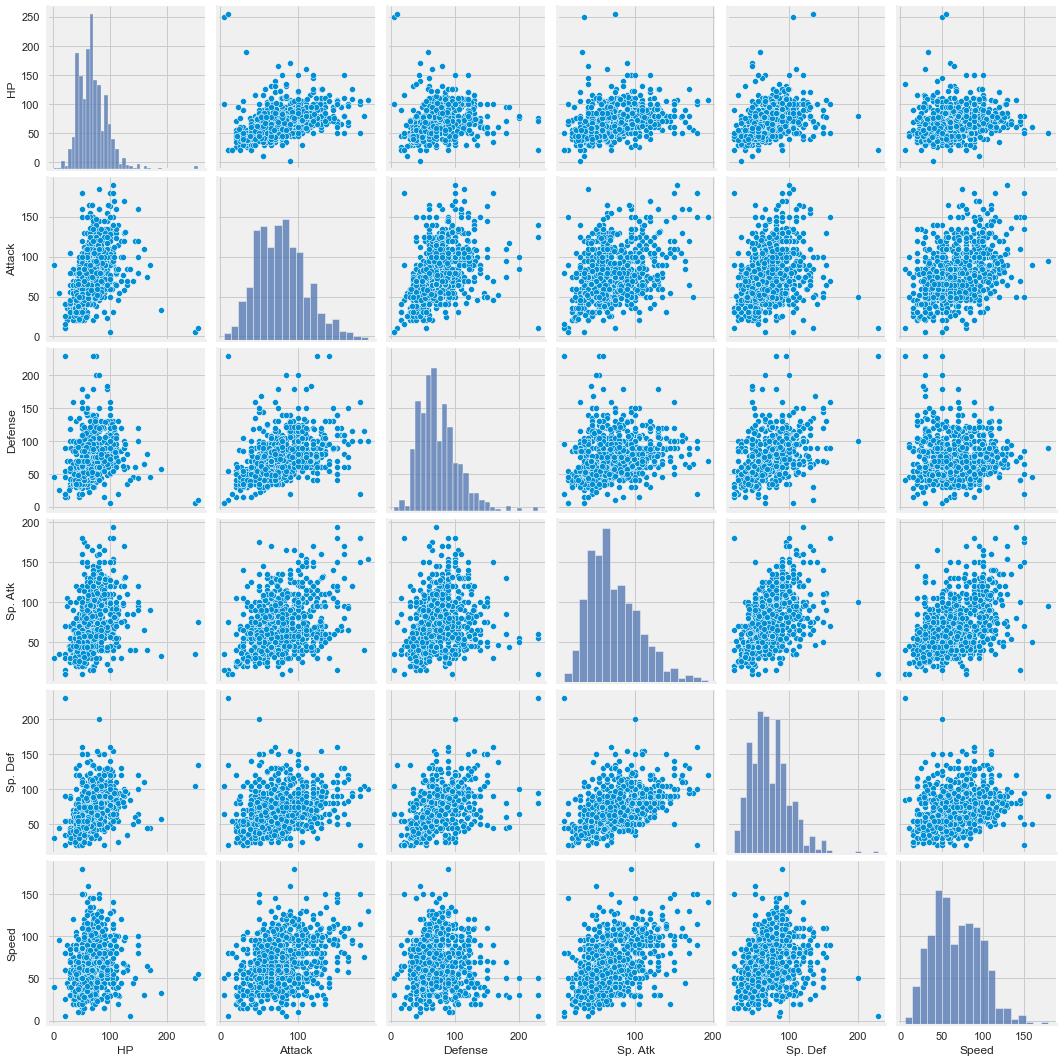

In [6]:
sns.pairplot(df.loc[:,'HP':'Speed'])

In [23]:
from sklearn.decomposition import PCA

In [30]:
pca = PCA()
x_pca = pca.fit_transform(df.loc[:,'HP':'Speed'])
df_pca = pd.DataFrame(x_pca,columns=['1st','2nd','3rd','4th','5th','6th'])


In [22]:
pca.explained_variance_ratio_#寄与率
#上位３つの変数で寄与率８割を占めているということは図示できる

array([0.45261031, 0.18778485, 0.13587055, 0.09822751, 0.08058197])

<function matplotlib.pyplot.show(close=None, block=None)>

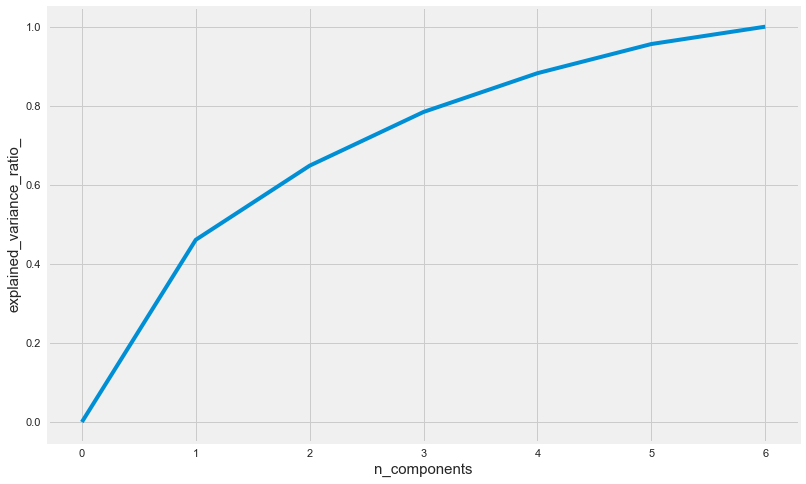

In [11]:
plt.figure(figsize=(12,8))
plt.plot(np.hstack([0,pca.explained_variance_ratio_.cumsum()]))#0から
plt.xlabel('n_components',fontsize=15)
plt.ylabel('explained_variance_ratio_',fontsize=15)
plt.show

In [13]:
pca.explained_variance_ratio_.cumsum()#累積和

array([0.46096131, 0.64848277, 0.7843244 , 0.88235919, 0.95614157,
       1.        ])

In [14]:
pca.components_#主成分負荷量　主成分得点と観測変数との相関係数のこと

array([[ 0.30080785,  0.49289178,  0.38063453,  0.50898063,  0.39436984,
         0.32726262],
       [ 0.04221029,  0.0765448 ,  0.69521578, -0.38331141,  0.17389431,
        -0.57607928],
       [-0.05898335, -0.73043106,  0.04150427,  0.38478597,  0.54078717,
        -0.14407571],
       [ 0.80159275,  0.02736268, -0.36601146,  0.10099765, -0.04170419,
        -0.45912547],
       [ 0.38716678, -0.1932467 , -0.02643827, -0.64085394,  0.37522525,
         0.51046142],
       [-0.33437231,  0.42376414, -0.48518697, -0.15829258,  0.61583212,
        -0.26250137]])

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(pca.components_,
cmap='Blues',
annot=True,annot_kws={'size':20},
fmt = '1.1f',
xticklabels=df.loc[:,'HP':'Speed'].columns,
yticklabels=['1st','2nd','3rd','4th','5th','6th'])

In [ ]:
df_pca['Legendary'] = df['Legendary']

fig,ax = plt.subplots(figsize=(12,8))
df_pca.plot(kind='scatter',
x='1st',
y='2nd',
s=100,
c='Legendary',
cmap='winter',
alpha=0.5,
ax=ax)

In [ ]:
#特徴量抽出
df1 = pd.read_csv('train.csv')
df1.head()

In [ ]:
df1.shape

In [ ]:
df1.isnull().sum()[df1.isnull().sum()>0]

In [ ]:
print('before:', df.shape)
df1 = df1.drop(columns=['LotFrontage','Alley','FireplaceQu','PoolQC','Fence','MiscFeature'])
print('after:',df1.shape)

In [ ]:
df1.dtypes.value_counts()

In [ ]:
all_columns = df1.columns.values
non_cat_cols = ["LotFrontage", "LotArea", "MasVnrArea", "BsmtFinSF1", 
                "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF", "1stFlrSF", 
                "2ndFlrSF", "LowQualFinSF", "GrLivArea", "GarageArea", 
                "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", 
                "ScreenPorch","PoolArea", "MiscVal"]

cat_cols = [col for col in all_columns if col not in non_cat_cols]


In [ ]:
nan_cols = df1.isnull().sum()[df1.isnull().sum() > 0].index
for col in nan_cols:
    if col in non_cat_cols:
        df1[col] = df1[col].fillna(df1[col].median())
    else:
        df1[col] = df1[col].fillna(df1[col].mode()[0])
df1 = pd.get_dummies(df1)
df1

In [ ]:
X = df1.drop(columns=['Id','SalePrice'])
y = df1['SalePrice']

x = np.log1p(X)
y = np.log1p(y)
X[X == -np.inf] = 0
x.shape


In [ ]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,random_state=0)

In [ ]:
pca = PCA()

In [ ]:
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.fit_transform(X_test)

pca.explained_variance_ratio_.cumsum()

In [ ]:
plt.figure(figsize=(12,8))
plt.plot(np.hstack([0,pca.explained_variance_ratio_.cumsum()]))#0から
plt.xlabel('n_components',fontsize=15)
plt.ylabel('explained_variance_ratio_',fontsize=15)
plt.show

In [ ]:
X_train_pca = X_train_pca[:,:8]
X_test_pca = X_test_pca[:,:8]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold,cross_val_score
from sklearn.metrics import mean_absolute_error

In [ ]:
%%time

cv = KFold(n_splits=5,shuffle=True,random_state=0)
rf_score = np.sqrt(-cross_val_score(RandomForestRegressor(n_estimators=500,max_depth=6),
                                                X = X_train,
                                                y = y_train,
                                                cv = cv,
                                                scoring = 'neg_mean_squared_error'))
print(rf_score.mean())

In [ ]:
%%time

cv = KFold(n_splits=5,shuffle=True,random_state=0)
rf_score_pca = np.sqrt(-cross_val_score(RandomForestRegressor(n_estimators=500,max_depth=6),
                                                X = X_train_pca,
                                                y = y_train,
                                                cv = cv,
                                                scoring = 'neg_mean_squared_error'))

print(rf_score_pca.mean())

In [ ]:
%%time
from sklearn.model_selection import GridSearchCV

rf_params_grid = {
    'max_depth' : range(5,11)
}

rf_score = np.sqrt(-cross_val_score(GridSearchCV(RandomForestRegressor(n_estimators=500,max_depth=6),
                                                param_grid=rf_params_grid,
                                                cv=cv),
                                                X = X_train_pca,
                                                y = y_train,
                                                cv = cv,
                                                scoring = 'neg_mean_squared_error'))



